# Human Resources Analytics Case Study
---------

## Analysing Kaggle dataset https://www.kaggle.com/ludobenistant/hr-analytics

### Outline:
1. Define the **objectives** of the analysis
2. **Exploring** the data
3. Developing a **predictive model** and **evaluate and interpret** the results
4. **Recommendations** and possible **improvements**

# 1. The objective of this analysis is two folds:
+ Enrich our understanding of what are the *main factors that lead to employee turnover*. This is very essential to developing a **staff retention strategy**.
+ Build a machine learning model to **predict turnover**.

There are various factors that can effect staff retention. These factors can be independent, **interactive with each other** and/or having a temporal effect. In this analysis we will look at how the employee data will help us mine this information and develop a understanding on why employees leave.

In this simulated dataset, we have been given 14999 employees data that describes
+ Level of satisfaction
+ Performance evaluation
+ Average of monthly hours 
+ Number of projects
+ Number of years spent at the company
+ Have had an accident at work
+ Have they been promoted in the last 5 years
+ Departments
+ Level of their salary, and
+ Have they left?!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Explore the data
------

__Load, check, summarise and start the exploration...__

In [2]:
hr_data = pd.read_csv('./human-resources-analytics.zip')

In [3]:
# Check the types of variables

hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [4]:
# View some samples of the data

hr_data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
3861,0.79,0.83,2,192,3,0,0,0,support,low
4787,0.87,0.90,4,163,2,0,0,0,support,medium
5901,0.88,0.59,2,144,3,0,0,0,sales,medium
10587,0.75,0.83,3,146,3,0,0,0,support,medium
8870,0.86,0.71,4,250,3,1,0,0,sales,low
8918,0.78,0.96,3,248,3,0,0,0,IT,medium
11690,0.83,0.48,4,220,3,1,0,0,support,low
5108,0.69,0.98,3,168,2,0,0,0,RandD,medium
13498,0.97,0.41,5,135,6,0,0,0,sales,medium
10626,0.16,0.54,5,206,5,0,0,0,sales,medium


In [5]:
#  Any missing values? It looks like we are lucky!
hr_data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [6]:
# Encode salary with numbers to create an ordinal variable.

encode_salary = {}
encode_salary['low'] = 0
encode_salary['medium'] = 1
encode_salary['high'] = 2

hr_data.loc[:, 'salary_encoded'] = hr_data.salary.apply(lambda x: encode_salary[x])

In [7]:
# Have a look at general statistics of the dataset (only numerical variables)
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encoded
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


In [8]:
#  Rename the variable names to more friendly names

hr_data.rename(columns={'last_evaluation': 'evaluation',
                        'sales': 'department',
                        'satisfaction_level': 'satisfaction',
                        'promotion_last_5years': 'promotion',
                        'average_montly_hours': 'montly_hours',
                        'Work_accident': 'accident',
                        'time_spend_company': 'years_in_company',
                        'number_project': 'projects_count'},
              inplace=True)

### Looking at pairwise interaction between variable, their distributions and value densities

/usr/local/lib/python2.7/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


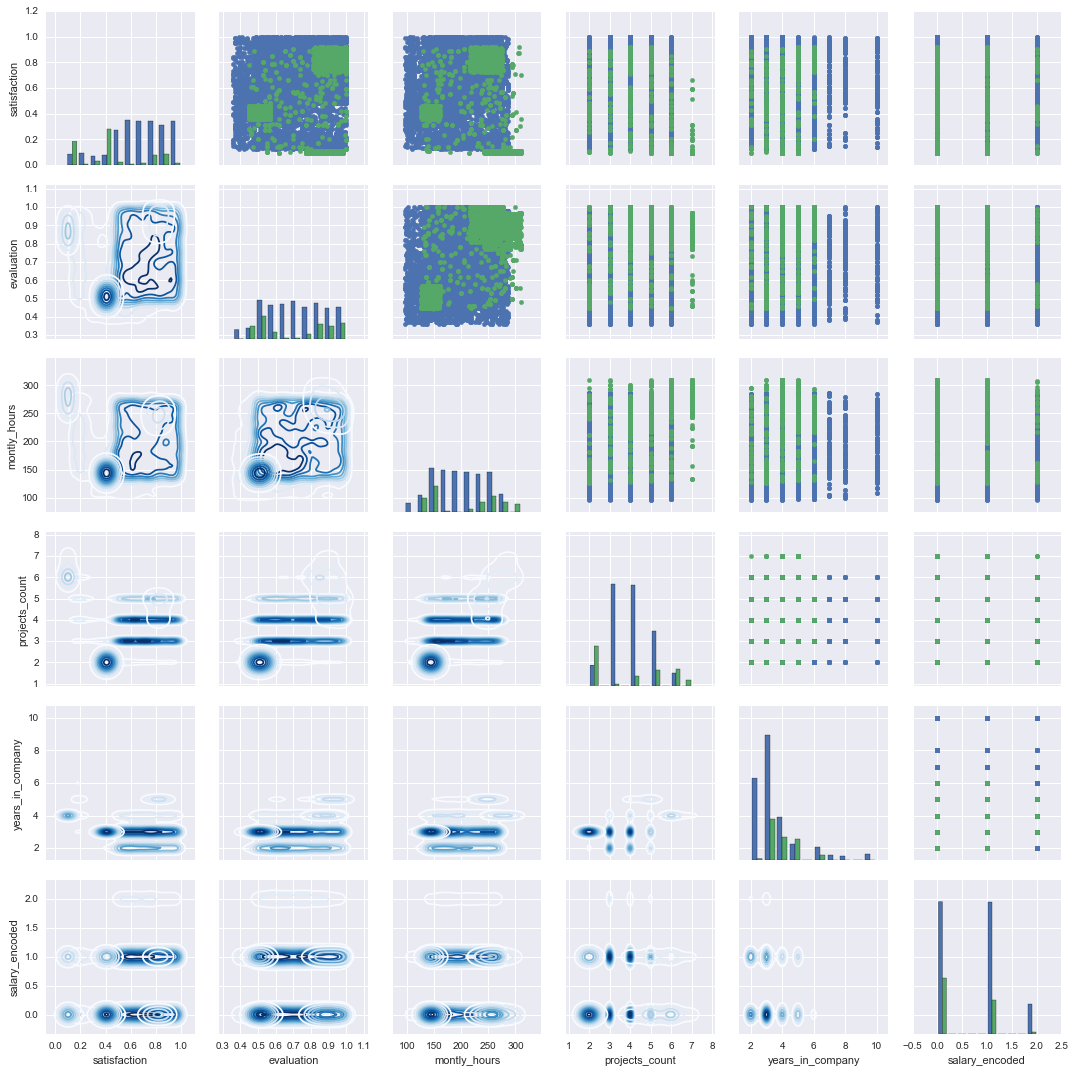

In [9]:
g = sn.PairGrid(data=hr_data, 
                vars=['satisfaction', 'evaluation', 
                      'montly_hours', 'projects_count',
                      'years_in_company', 'salary_encoded'],
                hue='left')

g = g.map_diag(plt.hist, histtype='bar')
g = g.map_upper(plt.scatter)
g = g.map_lower(sn.kdeplot, cmap="Blues")

In [29]:
# Define a function to generate a percentage 
def percentage_barplot(data, hue, var, label_rotation=0):
    tmp = (data[hue]
           .groupby(data[var])
           .value_counts(normalize=True)
           .rename('percentage')
           .reset_index())

    sn.barplot(x=var, y='percentage', hue=hue, data=tmp)
    plt.xticks(rotation=label_rotation, fontsize=14)
    plt.legend(fontsize=10)

### What about Categoricl and binary variables?

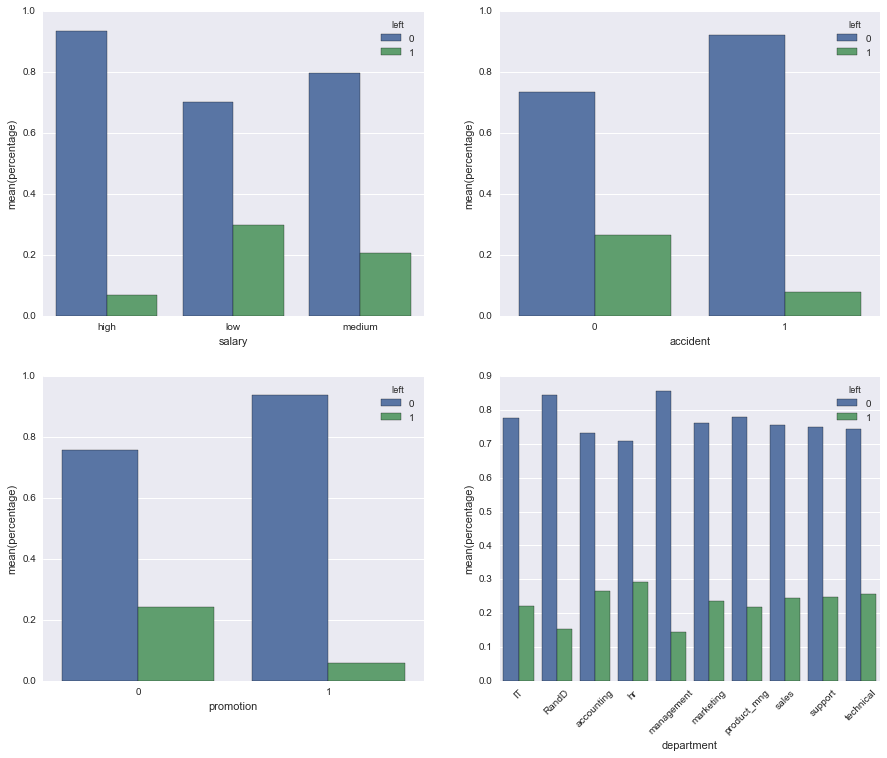

In [12]:
fig = plt.figure(figsize=(15, 12)) 
plt.subplot(2, 2, 1)
percentage_barplot(hr_data, 'left', 'salary')
plt.subplot(2, 2, 2)
percentage_barplot(hr_data, 'left', 'accident')
plt.subplot(2, 2, 3)
percentage_barplot(hr_data, 'left', 'promotion')
plt.subplot(2, 2, 4)
percentage_barplot(hr_data, 'left', 'department', 45)
plt.show()

## Now let's look at the interaction between different variable and the effect it might have on staff turnover

## The data will be grouped by different paried features to show if there is a particular group(s) that behave in a certian way

** We can see that turnover rate varies according to department and salary. **

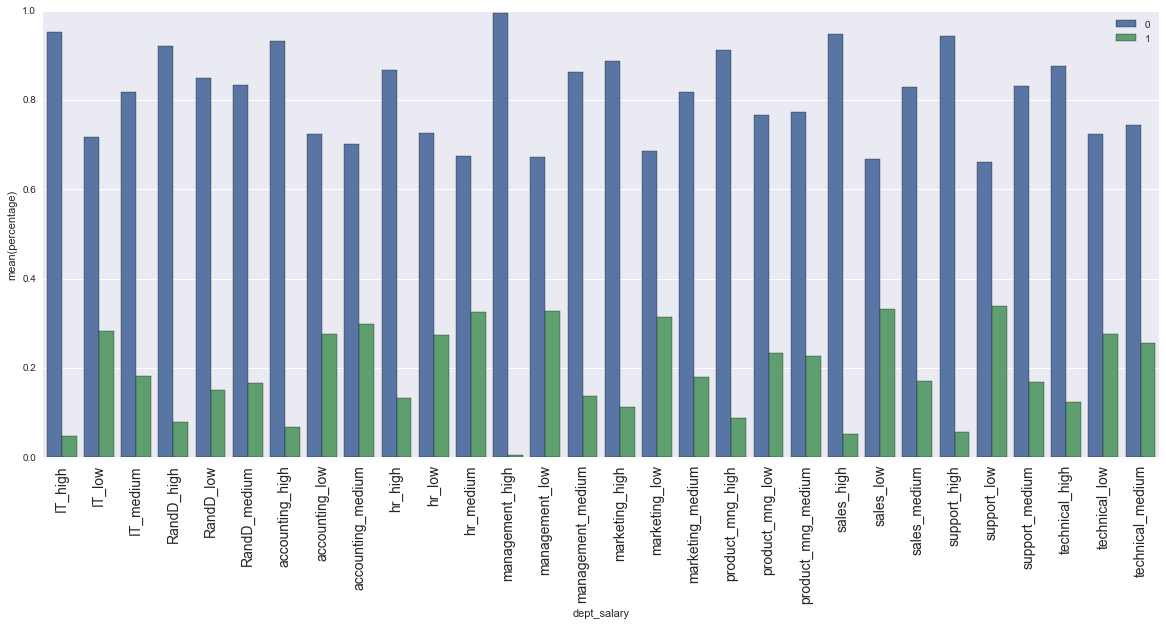

In [89]:
hr_data.loc[:, 'dept_salary'] = hr_data.department.astype(str) + '_' + hr_data.salary.astype(str)
fig = plt.figure(figsize=(20, 8)) 
percentage_barplot(hr_data, 'left', 'dept_salary', 90)

### This is an interesting one! Year at the company and promotion.
+ No turnover after 7 years
+ Promotion has clearly effected the turnover


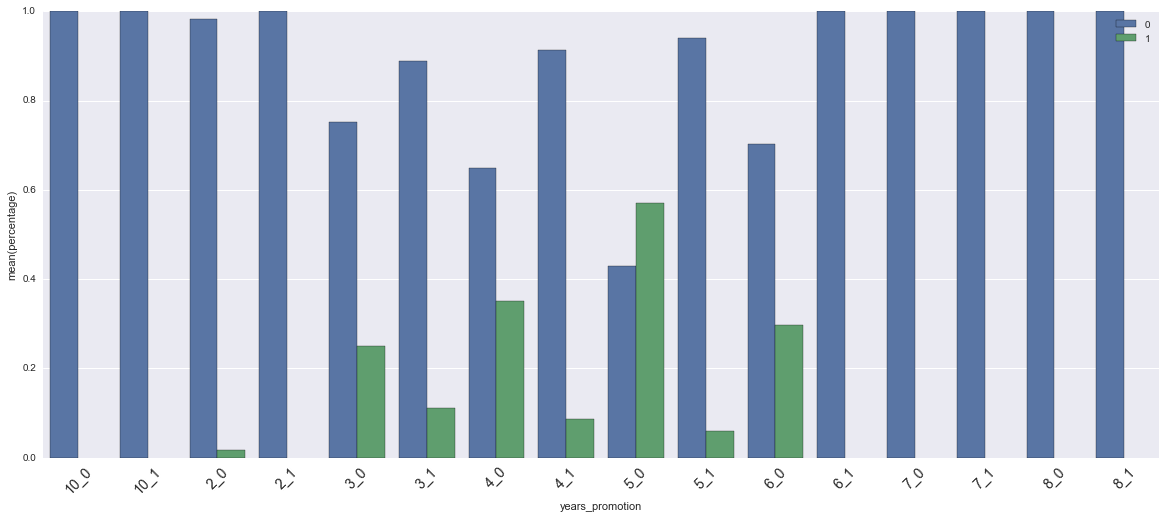

In [31]:
hr_data.loc[:, 'years_promotion'] = hr_data.years_in_company.astype(str) + '_' + hr_data.promotion.astype(str)
fig = plt.figure(figsize=(20, 8)) 
percentage_barplot(hr_data, 'left', 'years_promotion', 45)

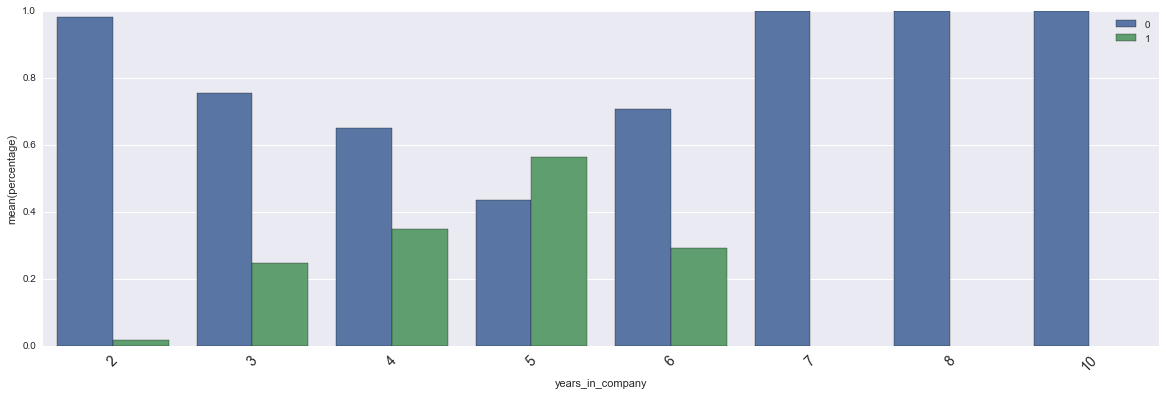

In [32]:
fig = plt.figure(figsize=(20, 6)) 
percentage_barplot(hr_data, 'left', 'years_in_company', 45)

### Salary definitly has an effect on emplyee retention rate that changes depending on the years spent at company.

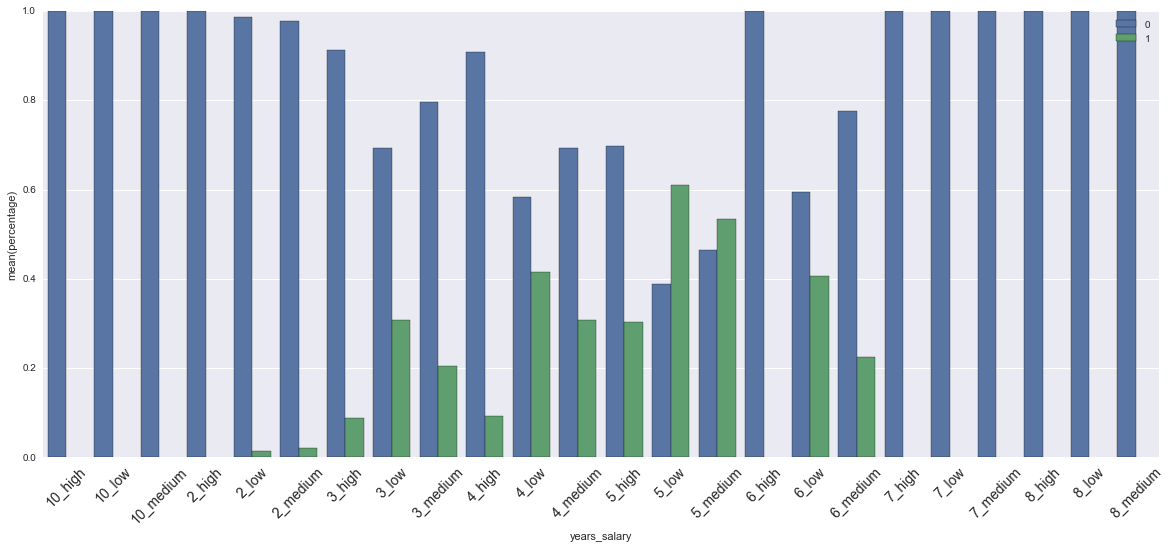

In [35]:
hr_data.loc[:, 'years_salary'] = hr_data.years_in_company.astype(str) + '_' + hr_data.salary.astype(str)
fig = plt.figure(figsize=(20, 8)) 
percentage_barplot(hr_data, 'left', 'years_salary', 45)

### Number of year at the company and number of projects
+ 7 projects effect!

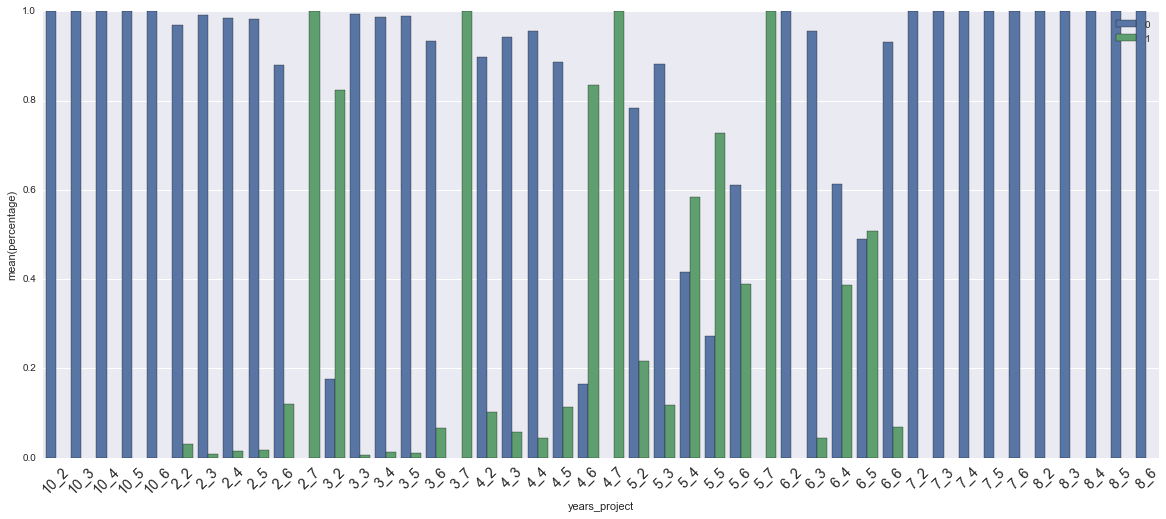

In [36]:
hr_data.loc[:, 'years_project'] = hr_data.years_in_company.astype(str) + '_' + hr_data.projects_count.astype(str)
fig = plt.figure(figsize=(20, 8)) 
percentage_barplot(hr_data, 'left', 'years_project', 45)

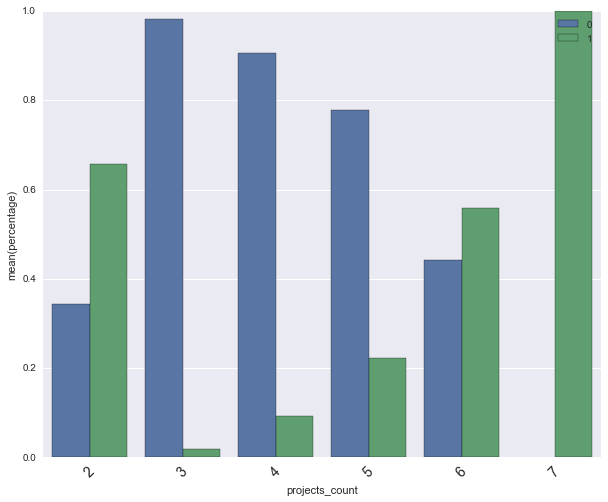

In [38]:
fig = plt.figure(figsize=(10, 8)) 
percentage_barplot(hr_data, 'left', 'projects_count', 45)

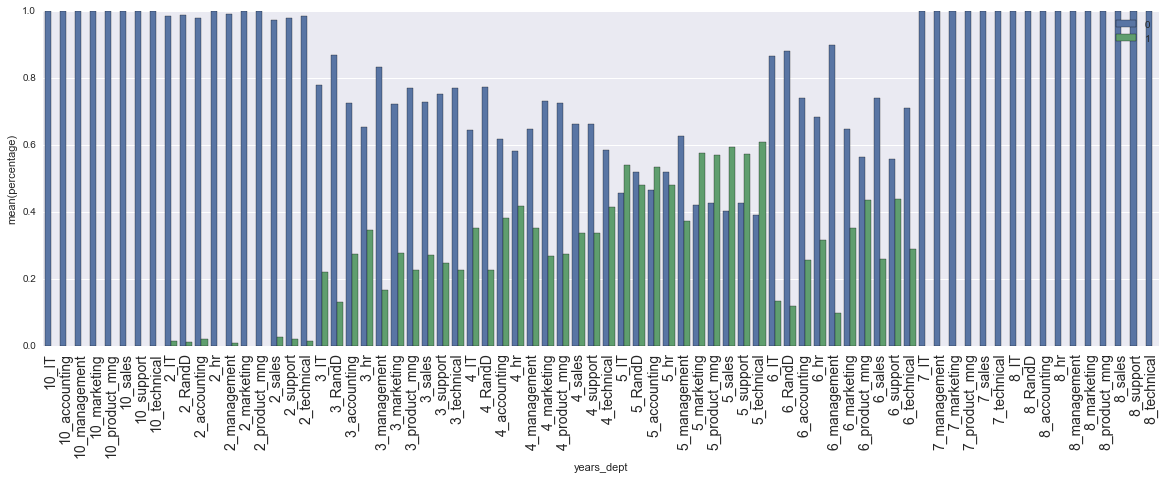

In [41]:
# Salary and department interaction

hr_data.loc[:, 'years_dept'] = hr_data.years_in_company.astype(str) + '_' +\
                               hr_data.department.astype(str)
fig = plt.figure(figsize=(20, 6)) 
percentage_barplot(hr_data, 'left', 'years_dept', 90)

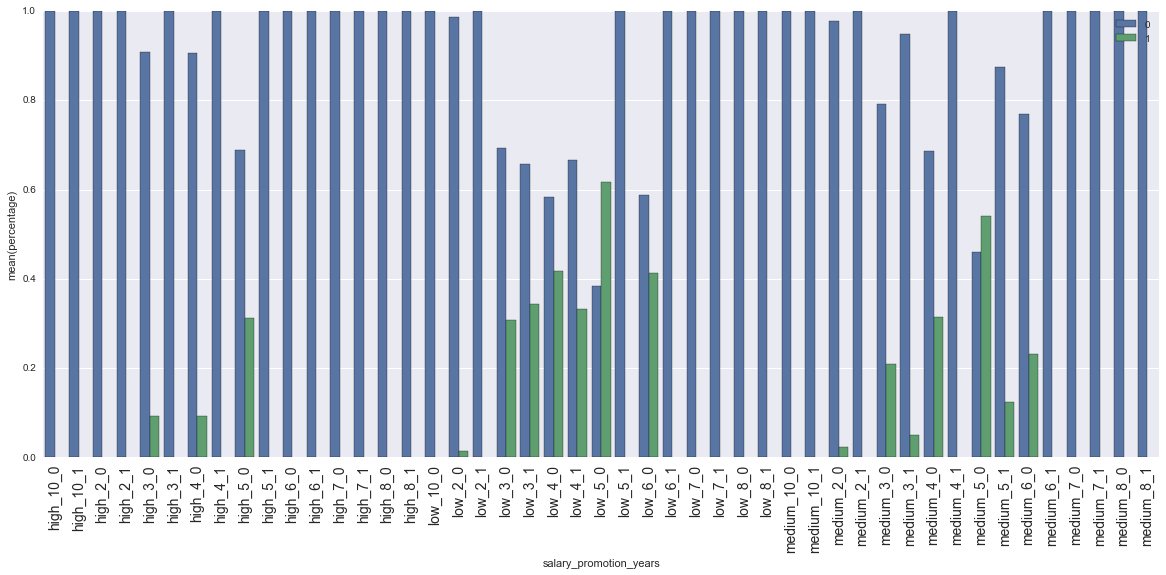

In [45]:
# Salary, promotion and years at the company

hr_data.loc[:, 'salary_promotion_years'] = hr_data.salary.astype(str) + '_' +\
                               hr_data.years_promotion.astype(str) 
fig = plt.figure(figsize=(20, 8)) 
percentage_barplot(hr_data, 'left', 'salary_promotion_years', 90)

## Now let's categorise the satisfaction and combine it with years at the company

Is it only unsatisfied emmployees leave?

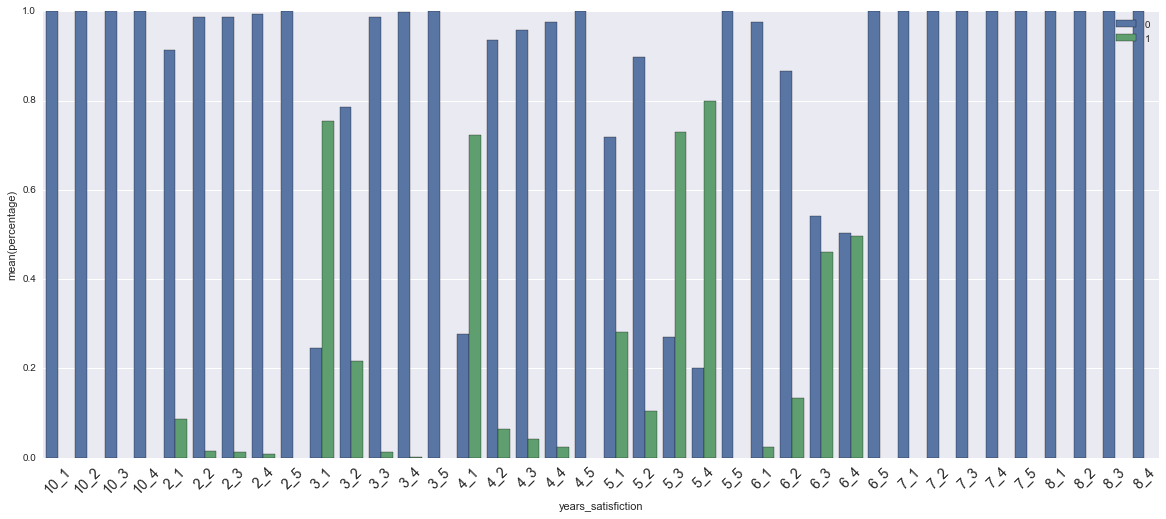

In [51]:
hr_data.loc[:, 'satisfaction_binned'] = np.digitize(hr_data.satisfaction, 
                    np.percentile(hr_data.satisfaction, [i for i in range(0, 101, 25)]))

hr_data.loc[:, 'years_satisfiction'] = hr_data.years_in_company.astype(str) + '_' +\
                                       hr_data.satisfaction_binned.astype(str)
    

fig = plt.figure(figsize=(20, 8)) 
percentage_barplot(hr_data, 'left', 'years_satisfiction', 45)

## Let's do the same with evaluation and combine it with satisfaction

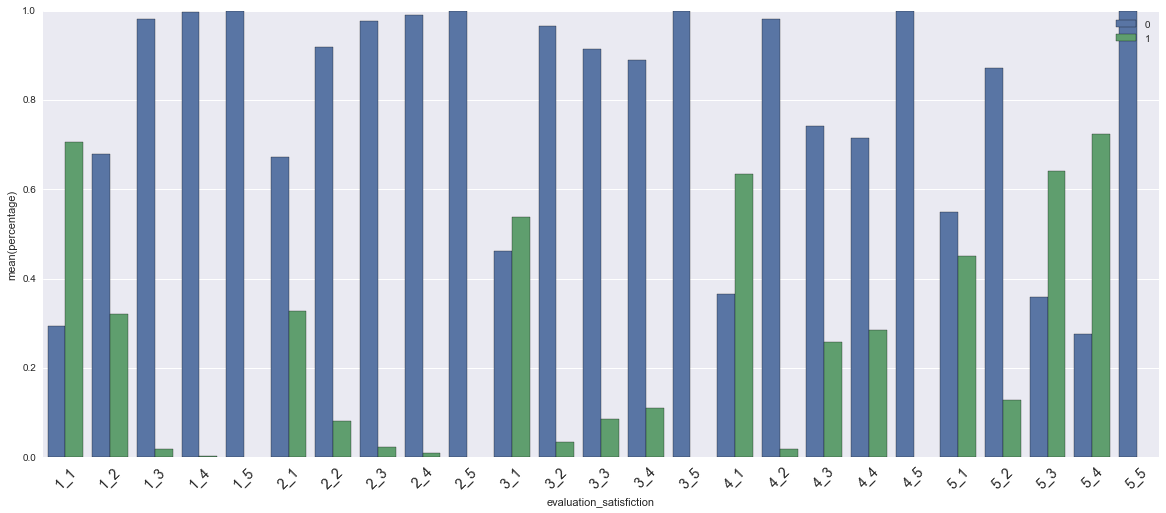

In [52]:
hr_data.loc[:, 'evaluation_binned'] = np.digitize(hr_data.evaluation, 
                    np.percentile(hr_data.evaluation, [i for i in range(0, 101, 25)]))

hr_data.loc[:, 'evaluation_satisfiction'] = hr_data.evaluation_binned.astype(str) + '_' +\
                                            hr_data.satisfaction_binned.astype(str) 

fig = plt.figure(figsize=(20, 8)) 
percentage_barplot(hr_data, 'left', 'evaluation_satisfiction', 45)

# Now let's characterise each employee with features capture the difference between the employee variable and the aggregation of a group they belong to.

+ ### Group the employees by different features: dept_salary, years_salary, years_promotion and years_salary_promotion
+ ### Calculate the mean of satisfaction, evaluation, montly_hours and projects_count within each group
+ ### Find the difference of the of the employee's features and the averages of their groups
+ ### Visualise the distribution of differences for employees who left and stayed

In [53]:
groups = ['dept_salary', 'years_salary', 'years_promotion', 'years_salary_promotion']
base_features = ['satisfaction', 'evaluation', 'montly_hours', 'projects_count']

def calc_features(data, group, base_features):
    grouped_df = data.groupby(group, as_index=False)[base_features]\
                      .agg({'satisfaction': {'satisfaction_avg': 'mean'}, 
                            'evaluation': {'evaluation_avg': 'mean'}, 
                            'montly_hours': {'montly_hours_avg': 'mean'},
                            'projects_count': {'projects_count_avg': 'mean'}})

    data = data.merge(grouped_df, on=group, how='inner')
    for f in base_features:
        data.loc[:, f + '_' + group + '_diff'] = data[f] - data[f + '_avg']
        del data[f + '_avg']
    return data

### We can notice that employees who left the company are often very different from the average values of each group. Their values in most cases form two distributions around the mean value. Whereas the retained employees have values centred around the mean of the group.

/usr/local/lib/python2.7/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


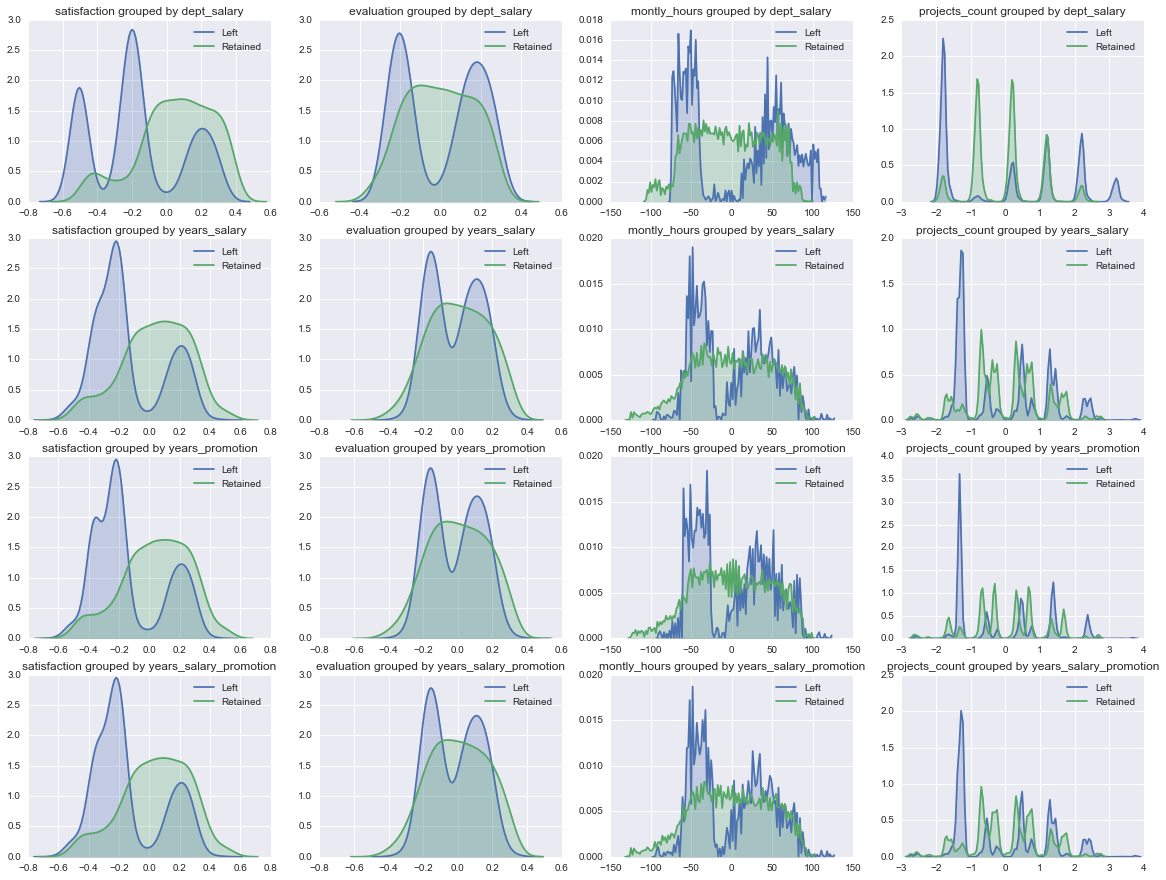

In [54]:
fig = plt.figure(figsize=(20, 15)) 
calculated_features = []

for k, group in enumerate(groups):
    hr_data = calc_features(hr_data, group, base_features)
    for i, f in enumerate(base_features):
        plt.subplot(len(groups), len(base_features), k * len(groups) + i + 1)
        sn.kdeplot(hr_data.loc[hr_data.left == 1, f + '_' + group + '_diff'], shade=True, bw=0.05)
        sn.kdeplot(hr_data.loc[hr_data.left == 0, f + '_' + group + '_diff'], shade=True, bw=0.05)
        calculated_features.append(f + '_' + group + '_diff')
        plt.legend(['Left', 'Retained'])
        plt.title(f + ' grouped by ' + group)

# 3. Developing Predictive Model and Evaluate and Interpret the Results

### I will be building 3 models using Random Forest Classifier. The only differnce between these models is I have added new features everytime I build a new one. These fearures are engineered in light of the analysis I have done above.

To evaluate each model, we used cross validation on 10 folds. Every time the trained model is evaluated using the following metrics:
1. **Accuracy**: quantifies how many correct predictions made over all predictions made by the model.
2. **Precision**: measures the proportion of employee predicted to be leaving are actually leaving.
3. **Recall**: measures the proportion of correctly predicted leaving employees of the total number of actually leaving.
4. **F1-Score**: is the Harmonic Mean of recall and precision.
5. **Logloss**: measures the prediction power of the model by looking at the probabilities of the predictions.
6. **Area under the curve (AUC)**: measures the area under receiver operating characteristic curve (ROC).
7. **Confusion Matrix**: to show the values of True Positive, False Positive, True Negative and False Negative

In [55]:
original_features = ['satisfaction', 'evaluation', 'projects_count', 'montly_hours',
                     'years_in_company', 'accident', 'promotion', 'salary_encoded']

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, auc, confusion_matrix
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score

# Model 1

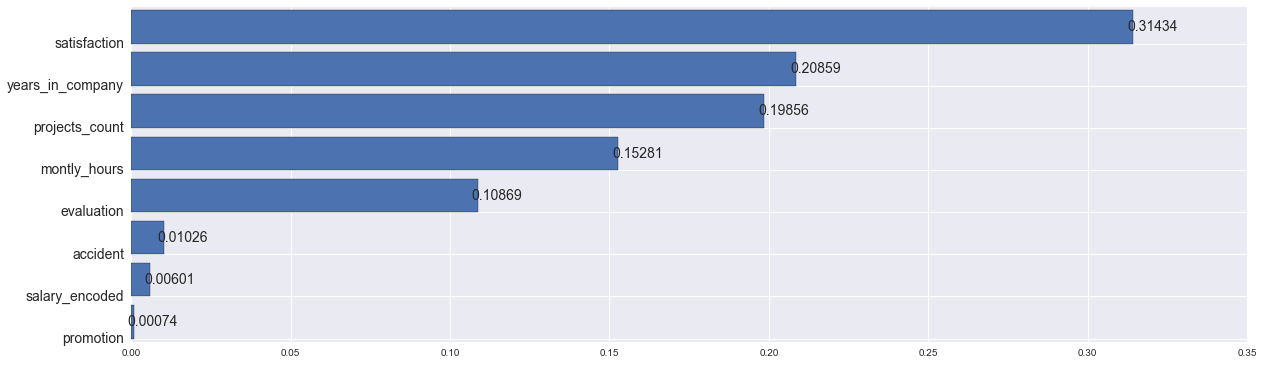

In [57]:
model_features = original_features 

skf = StratifiedKFold(n_splits=10, random_state=44)

actual_left = []
predicted_proba_left = []
predicted_left = []

accuracy_scores = []
logloss_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in skf.split(np.zeros(len(hr_data)), hr_data.left.values):
    train = hr_data.iloc[train_index]
    test = hr_data.iloc[test_index]

    model = RandomForestClassifier(n_estimators=50, max_depth=7, max_features=0.3, n_jobs=-1)

    model = model.fit(train[model_features], train.left)
    pred_left = model.predict(test[model_features])
    pred_proba_left = model.predict_proba(test[model_features])[:, 1]
    
    accuracy_scores.append(accuracy_score(test.left, pred_left))
    logloss_scores.append(log_loss(test.left.values, pred_proba_left))
    precision_scores.append(precision_score(test.left.values, pred_left))
    recall_scores.append(recall_score(test.left.values, pred_left))
    f1_scores.append(f1_score(test.left.values, pred_left))
    
    actual_left.extend(test.left.values)
    predicted_left.extend(pred_left)
    predicted_proba_left.extend(pred_proba_left)
    
model = model.fit(hr_data[model_features], hr_data.left)
fi = sorted(zip(model.feature_importances_, model_features), 
            key=lambda x: x[0])

fig, ax = plt.subplots(figsize=(20, 6))
ax.barh(range(len(fi)), [x[0] for x in fi])
ax.set_yticks(range(len(fi)))
ax.set_yticklabels([x[1] for x in fi], fontsize=14)
plt.margins(y=0.01)


rects = ax.patches
labels = ['%0.5f'%x for x, _ in fi]
for rect, label in zip(rects, labels):
    w = rect.get_width()
    h = rect.get_height()
    ax.text(w + 0.006 , rect.get_y() + h/2, label, ha='center', va='center', fontsize=14)

plt.show()

### In order to quantify the effect each feature has on the prediction power of the model, feature importances attribute is visualised

Accuracy Scores, mean:	0.97199 	and StD:	0.02394
Logloss Scores, mean:	0.14670 	and StD:	0.08243
Precision Scores, mean:	0.98404 	and StD:	0.01591
Recall Scores, mean:	0.89693 	and StD:	0.09973
F1 Scores, mean:	0.93527 	and StD:	0.06270


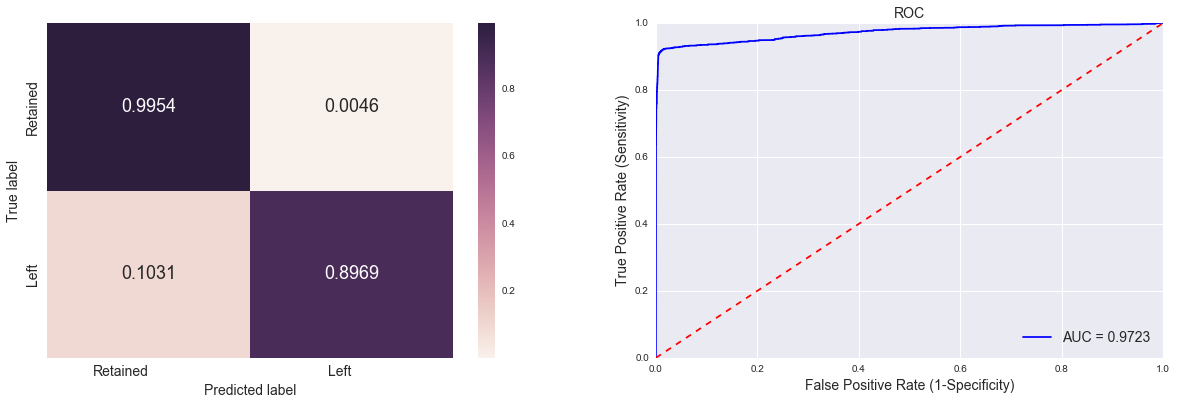

In [58]:
print 'Accuracy Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(accuracy_scores), np.std(accuracy_scores))
print 'Logloss Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(logloss_scores), np.std(logloss_scores))
print 'Precision Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(precision_scores), np.std(precision_scores))
print 'Recall Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(recall_scores), np.std(recall_scores))
print 'F1 Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(f1_scores), np.std(f1_scores))


fig = plt.figure(figsize=(20, 6)) 
plt.subplot(1, 2, 1)

mc = confusion_matrix(actual_left, predicted_left)
mc = mc.astype(float)
mc[0, :] = mc[0, :] / (len(actual_left) - sum(actual_left))
mc[1, :] = mc[1, :] /   sum(actual_left)

heatmap = sn.heatmap(mc, annot=True, annot_kws={'size':18}, fmt='0.4f')
heatmap.yaxis.set_ticklabels(['Left', 'Retained'], rotation=90, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(['Retained', 'Left'], rotation=0, ha='right', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)

plt.subplot(1, 2, 2)
fpr, tpr, threshold = roc_curve(actual_left, predicted_proba_left)
roc_auc = auc(fpr, tpr)
plt.title('ROC', fontsize=14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right', fontsize=14)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=14)

plt.show()

# Model 2
### we added the following features:
+ **satisfaction_evaluation_diff**: to quantify the difference between satisfaction and evaluation
+ **hours_per_project**: to calculate the average of hours spent per project
+ **satisfaction_salary**: this feature has the satisfaction level boosted by salary!
+ **satisfaction_promotion**: this feature has the satisfaction level boosted by promotion!
+ **years_projects**: the product of years of service and number of projects, just to capture any interaction between the two features

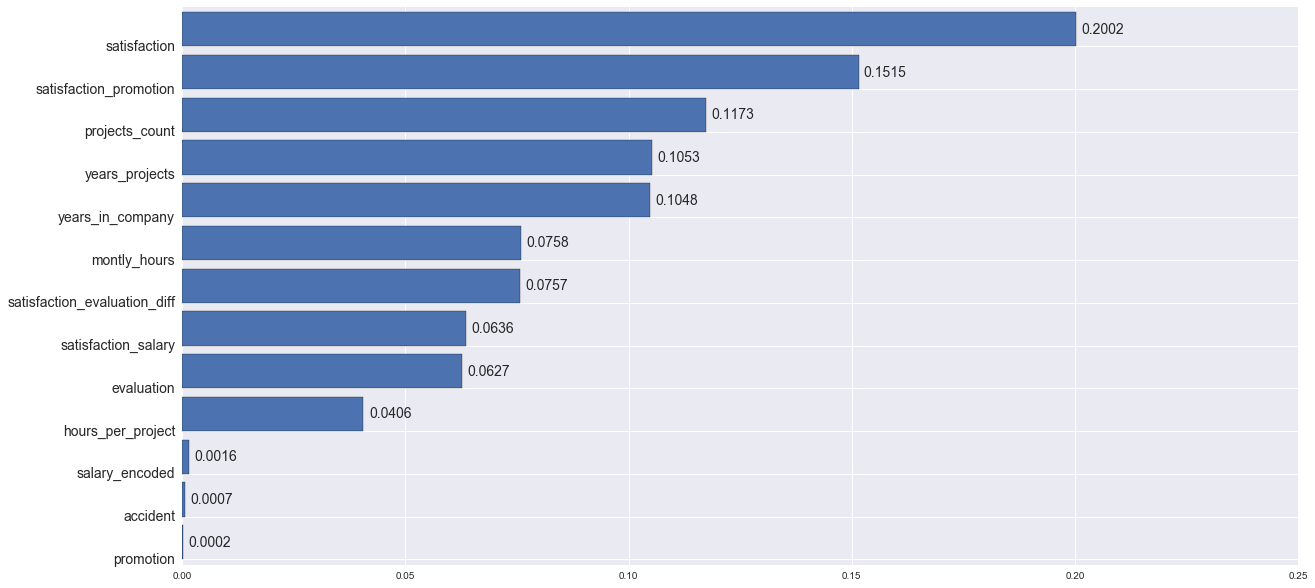

In [59]:
hr_data.loc[:, 'satisfaction_evaluation_diff'] = hr_data.satisfaction - hr_data.evaluation
hr_data.loc[:, 'hours_per_project'] = hr_data.montly_hours / hr_data.projects_count
hr_data.loc[:, 'satisfaction_salary'] = hr_data.satisfaction + hr_data.salary_encoded / 10.0 
hr_data.loc[:, 'satisfaction_promotion'] = hr_data.satisfaction + hr_data.promotion * 0.2 
hr_data.loc[:, 'years_projects'] = hr_data.years_in_company * hr_data.projects_count

model_features = original_features + ['satisfaction_evaluation_diff', 'hours_per_project', 
                                      'satisfaction_salary', 'satisfaction_promotion', 'years_projects']

skf = StratifiedKFold(n_splits=10, random_state=44)

actual_left = []
predicted_proba_left = []
predicted_left = []

accuracy_scores = []
logloss_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in skf.split(np.zeros(len(hr_data)), hr_data.left.values):
    train = hr_data.iloc[train_index]
    test = hr_data.iloc[test_index]

    model = RandomForestClassifier(n_estimators=50, max_depth=7, max_features=0.3, n_jobs=-1)
    
    model = model.fit(train[model_features], train.left)
    pred_left = model.predict(test[model_features])
    pred_proba_left = model.predict_proba(test[model_features])[:, 1]
    
    accuracy_scores.append(accuracy_score(test.left, pred_left))
    logloss_scores.append(log_loss(test.left.values, pred_proba_left))
    precision_scores.append(precision_score(test.left.values, pred_left))
    recall_scores.append(recall_score(test.left.values, pred_left))
    f1_scores.append(f1_score(test.left.values, pred_left))
    
    actual_left.extend(test.left.values)
    predicted_left.extend(pred_left)
    predicted_proba_left.extend(pred_proba_left)
    
model = model.fit(hr_data[model_features], hr_data.left)
fi = sorted(zip(model.feature_importances_, model_features), 
            key=lambda x: x[0])

fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(range(len(fi)), [x[0] for x in fi])
ax.set_yticks(range(len(fi)))
ax.set_yticklabels([x[1] for x in fi], fontsize=14)
plt.margins(y=0.01)


rects = ax.patches
labels = ['%0.4f'%x for x, _ in fi]
for rect, label in zip(rects, labels):
    w = rect.get_width()
    h = rect.get_height()
    ax.text(w + 0.006 , rect.get_y() + h/2, label, ha='center', va='center', fontsize=14)

plt.show()

### We can see that this model has performed better!
+ Better recall score
+ Better Logloss score
+ Slightly less Precision score, but better F1-score

### We can see that satisfaction_promotion feature has scored high in feature importances. All other new features have a significant level of importance for the model.

Accuracy Scores, mean:	0.97426 	and StD:	0.01939
Logloss Scores, mean:	0.12589 	and StD:	0.08489
Precision Scores, mean:	0.98183 	and StD:	0.01999
Recall Scores, mean:	0.90841 	and StD:	0.07331
F1 Scores, mean:	0.94230 	and StD:	0.04698


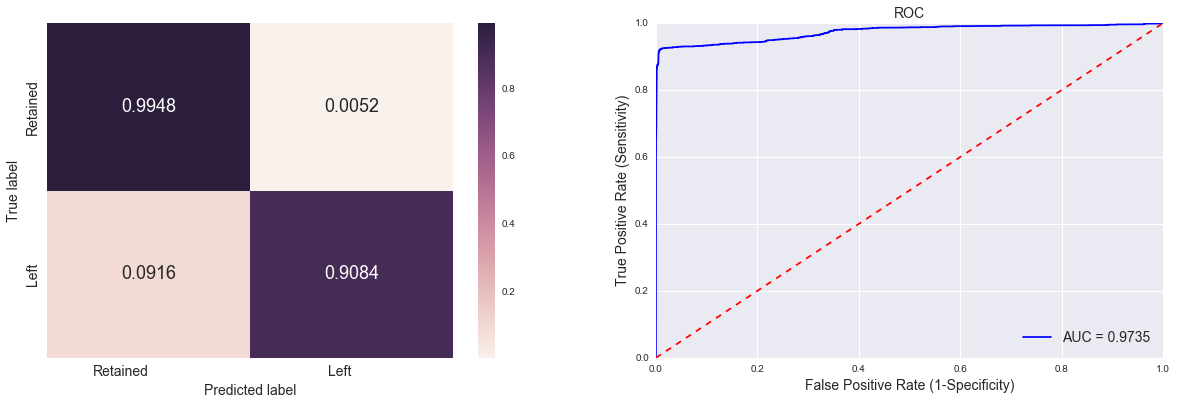

In [60]:
print 'Accuracy Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(accuracy_scores), np.std(accuracy_scores))
print 'Logloss Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(logloss_scores), np.std(logloss_scores))
print 'Precision Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(precision_scores), np.std(precision_scores))
print 'Recall Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(recall_scores), np.std(recall_scores))
print 'F1 Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(f1_scores), np.std(f1_scores))


fig = plt.figure(figsize=(20, 6)) 
plt.subplot(1, 2, 1)

mc = confusion_matrix(actual_left, predicted_left)
mc = mc.astype(float)
mc[0, :] = mc[0, :] / (len(actual_left) - sum(actual_left))
mc[1, :] = mc[1, :] /   sum(actual_left)

heatmap = sn.heatmap(mc, annot=True, annot_kws={"size":18}, fmt='0.4f')
heatmap.yaxis.set_ticklabels(['Left', 'Retained'], rotation=90, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(['Retained', 'Left'], rotation=0, ha='right', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)

plt.subplot(1, 2, 2)
fpr, tpr, threshold = roc_curve(actual_left, predicted_proba_left)
roc_auc = auc(fpr, tpr)
plt.title('ROC', fontsize=14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right', fontsize=14)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=14)

plt.show()

# Model 3
### In this model I added a set of new features. I grouped the data by department and then calculated the median for 'satisfaction', 'evaluation', 'montly_hours' and 'projects_count' and the mean for 'salary_encoded' and 'promotion'. Then I calculated the differnece of each employee value from the mean/median of the department.

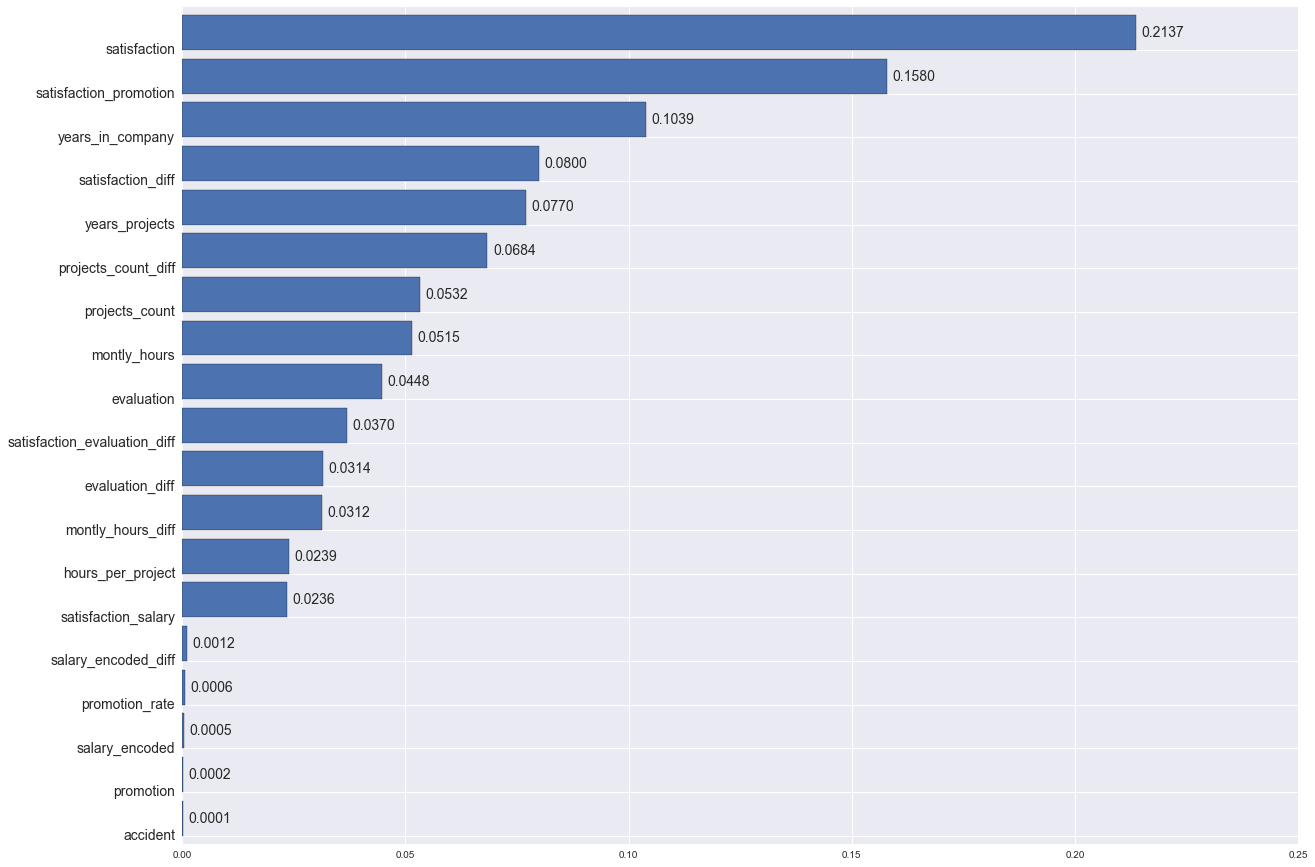

In [86]:
agg_features = []
base_features = ['satisfaction', 'evaluation', 'montly_hours', 'projects_count', 'salary_encoded']

for f in hr_data.columns:
    if '_avg' in f or '_rate' in f:
        del hr_data[f]

grouped_df = hr_data.groupby('department', as_index=False)[base_features+ ['promotion']]\
                    .agg({'satisfaction': {'satisfaction_avg': 'median'}, 
                          'evaluation': {'evaluation_avg': 'median'}, 
                          'montly_hours': {'montly_hours_avg': 'median'},
                          'projects_count': {'projects_count_avg': 'median'},
                          'salary_encoded': {'salary_encoded_avg': 'mean'},
                          'promotion': {'promotion_rate': 'mean'}
                         })
    
hr_data = hr_data.merge(grouped_df, on='department', how='inner')

for f in base_features:
    hr_data.loc[:, f + '_diff'] = hr_data[f] - hr_data[f+'_avg']
    agg_features.append(f + '_diff')
    
    
hr_data.loc[:, 'satisfaction_evaluation_diff'] = hr_data.satisfaction - hr_data.evaluation
hr_data.loc[:, 'hours_per_project'] = hr_data.montly_hours / hr_data.projects_count
hr_data.loc[:, 'satisfaction_salary'] = hr_data.satisfaction + hr_data.salary_encoded / 10.0 
hr_data.loc[:, 'satisfaction_promotion'] = hr_data.satisfaction + hr_data.promotion * 0.2 
hr_data.loc[:, 'years_projects'] = hr_data.years_in_company * hr_data.projects_count

model_features = original_features + agg_features  + ['promotion_rate', 'satisfaction_evaluation_diff', 
                                                      'hours_per_project', 'satisfaction_salary', 
                                                      'satisfaction_promotion', 'years_projects']

skf = StratifiedKFold(n_splits=10, random_state=44)

actual_left = []
predicted_proba_left = []
predicted_left = []

accuracy_scores = []
logloss_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in skf.split(np.zeros(len(hr_data)), hr_data.left.values):
    train = hr_data.iloc[train_index]
    test = hr_data.iloc[test_index]

    model = RandomForestClassifier(n_estimators=50, max_depth=7, max_features=0.3, n_jobs=-1)
    model = model.fit(train[model_features], train.left)
    pred_left = model.predict(test[model_features])
    pred_proba_left = model.predict_proba(test[model_features])[:, 1]
    
    accuracy_scores.append(accuracy_score(test.left, pred_left))
    logloss_scores.append(log_loss(test.left.values, pred_proba_left))
    precision_scores.append(precision_score(test.left.values, pred_left))
    recall_scores.append(recall_score(test.left.values, pred_left))
    f1_scores.append(f1_score(test.left.values, pred_left))
    
    actual_left.extend(test.left.values)
    predicted_left.extend(pred_left)
    predicted_proba_left.extend(pred_proba_left)

model = model.fit(hr_data[model_features], hr_data.left)
fi = sorted(zip(model.feature_importances_, model_features), 
            key=lambda x: x[0])

fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(range(len(fi)), [x[0] for x in fi])
ax.set_yticks(range(len(fi)))
ax.set_yticklabels([x[1] for x in fi], fontsize=14)
plt.margins(y=0.01)


rects = ax.patches
labels = ['%0.4f'%x for x, _ in fi]
for rect, label in zip(rects, labels):
    w = rect.get_width()
    h = rect.get_height()
    ax.text(w + 0.006 , rect.get_y() + h/2, label, ha='center', va='center', fontsize=14)

plt.show()
        

## Some of the new features seem to be very vital for the model.

Accuracy Scores, mean:	0.97260 	and StD:	0.02117
Logloss Scores, mean:	0.11074 	and StD:	0.05679
Precision Scores, mean:	0.96874 	and StD:	0.06556
Recall Scores, mean:	0.91990 	and StD:	0.04294
F1 Scores, mean:	0.94194 	and StD:	0.04143


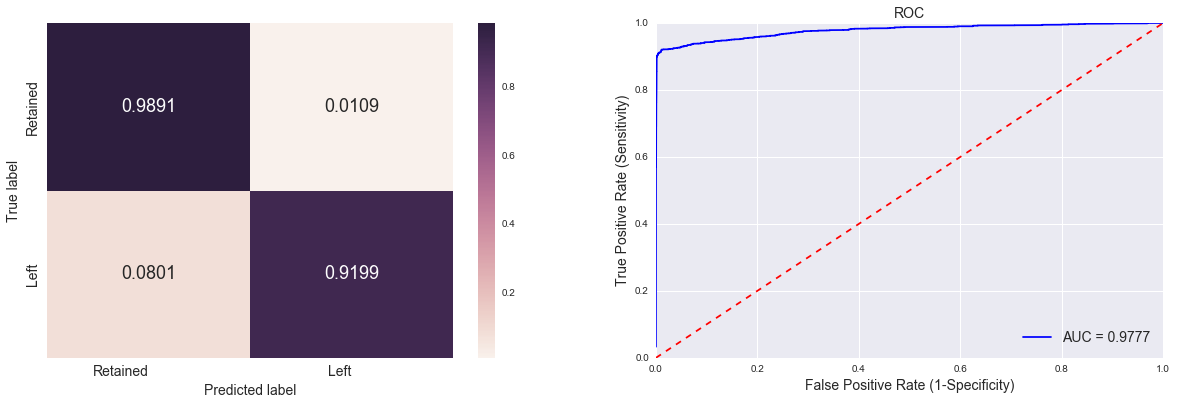

In [87]:
print 'Accuracy Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(accuracy_scores), np.std(accuracy_scores))
print 'Logloss Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(logloss_scores), np.std(logloss_scores))
print 'Precision Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(precision_scores), np.std(precision_scores))
print 'Recall Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(recall_scores), np.std(recall_scores))
print 'F1 Scores, mean:\t%0.5f \tand StD:\t%0.5f'% (np.mean(f1_scores), np.std(f1_scores))


fig = plt.figure(figsize=(20, 6)) 
plt.subplot(1, 2, 1)

mc = confusion_matrix(actual_left, predicted_left)
mc = mc.astype(float)
mc[0, :] = mc[0, :] / (len(actual_left) - sum(actual_left))
mc[1, :] = mc[1, :] /   sum(actual_left)

heatmap = sn.heatmap(mc, annot=True, annot_kws={"size":18}, fmt='0.4f')
heatmap.yaxis.set_ticklabels(['Left', 'Retained'], rotation=90, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(['Retained', 'Left'], rotation=0, ha='right', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)

plt.subplot(1, 2, 2)
fpr, tpr, threshold = roc_curve(actual_left, predicted_proba_left)
roc_auc = auc(fpr, tpr)
plt.title('ROC', fontsize=14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right', fontsize=14)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=14)

plt.show()

### Better scores as well!

# 4. Recommendations and Possile Improvements

###  Recommendation:
+ Satisfaction is a very important indicator of turnover. Lower level of satisfaction can be associated with less staff retention.
+ Employees would like to be rewarded. The model 2 showed that increasing the satisfaction level if an employee has received a promotion or higher salary would improve the prediction of the model.
+ Employees with higher workload compare to their peers would usually quit!
+ In general high work load is an indicator of turnover.
+ A large gap between satisfaction and evaluation is not a good sign.

### Possible improvements:
+ Parameter tuning of the model
+ Use other algorithm
+ Undersample negative samples by removing overlapped samples

